# Datasets related to COVID-19 spread. 2020-05-27 06:36:03 

In [34]:
from __future__ import unicode_literals  # or use u"unicode strings"
import numpy as np
import scipy as sc
from scipy.stats import norm
from pprint import pprint

import matplotlib
#matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt
import pandas as pd
import requests, io
from datetime import datetime
pd.set_option('float_format', '{:f}'.format)

In [35]:
# Preparedness

## %pip install --upgrade --force pandas==1.0.3

#### GLOBAL JOHN HOPKINS DATASETS
_url       = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
_urlrecovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
_urldeaths    = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

### ARGENTINA DATASETS

arg_confirmed = 'https://github.com/Wolffoner/COVID19_Argentina/raw/master/COVID19-Argentina/CSV/COVID19_Confirmed.csv'
arg_deaths ='https://github.com/Wolffoner/COVID19_Argentina/raw/master/COVID19-Argentina/CSV/COVID19_Deaths.csv'
arg_evolution = 'https://github.com/Wolffoner/COVID19_Argentina/raw/master/COVID19-Argentina/CSV/COVID19_Evolution.csv'
arg_lookup_table = 'https://github.com/Wolffoner/COVID19_Argentina/raw/master/COVID19-Argentina/CSV/Lat_Long_Provincias_Argentinas.csv'
arg2_geojson = 'https://raw.githubusercontent.com/GIBD/covid/master/data/ar-all.geo.json'

arg2_total = 'https://github.com/GIBD/covid/raw/master/data/argentina.csv'
arg2_arg = 'https://github.com/GIBD/covid/raw/master/data/COVID_Arg.csv'
arg2_deaths = 'https://github.com/GIBD/covid/raw/master/data/fallecidos.csv'
arg2_poblacion ='https://github.com/GIBD/covid/raw/master/data/poblacionArg.csv'
latam_geojson = 'https://raw.githubusercontent.com/GIBD/covid/master/data/south-america.geo.json'

In [36]:
print('reading time series')
confirmed=requests.get(_url).content
deaths=requests.get(_urldeaths).content
recovered=requests.get(_urlrecovered).content

df_recovered=pd.read_csv(io.StringIO(recovered.decode('utf-8')))
df_deaths=pd.read_csv(io.StringIO(deaths.decode('utf-8')))
df_confirmed=pd.read_csv(io.StringIO(confirmed.decode('utf-8')))
df_confirmed

reading time series


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,235,246,251,251,251,251,251,251,299,441
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,128,130,167,184,197,209,212,222,233,249
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,11,11,11,34,34,78,78,87,87,87
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,1524,1729,1936,2140,2350,2551,2738,2929,3100,3266


In [37]:
skip = 4
myset = df_confirmed.loc[df_confirmed['Country/Region'] == 'Argentina' ]

def parse_by_region(dataset, place):    
    myset = dataset.loc[dataset['Country/Region'] == place ]
    dloc = myset.values[0][2]
    dpos = myset.values[0][3]
    # print( 'long: %.4f - lat: %.4f' % ( dloc,dpos ))
    # pprint(myset.values[0])

    datecount = range(len(myset.columns))
    # npf = pd.DataFrame(data = {}, columns=['date','count'])
    npf = []

    m=0
    for n in datecount:
        if n>3:        

            date = myset.columns[n]
            datetime_object = datetime.strptime(date, '%m/%d/%y')
            val = myset.values[0][n]
            pf2 = {m: {'date': datetime_object.date(), 'count': val}}
            npf.append(pf2)        
            m+=1

    return npf

In [38]:
normalized_data = parse_by_region(df_confirmed, 'Argentina')
npf = normalized_data

print("Count matches", len(npf)==len(myset.values[0])-skip)
print("First date: ", npf[0])
print("Last record: ", npf[-1])

Count matches True
First date:  {0: {'date': datetime.date(2020, 1, 22), 'count': 0}}
Last record:  {125: {'date': datetime.date(2020, 5, 26), 'count': 13228}}


In [33]:
def extract_remarks(datasets, placeslist):
    for place in placeslist:
        for dataset in datasets:
            legend=dataset[0]
            ndata = parse_by_region(dataset[1], place)
            size = len(ndata)
            val = ndata[-1][size-1]['date']
            total = ndata[-1][size-1]['count']
            print("%s:\t\t %s\t => %s" %( place+legend, total,  val))
            n0,n1,n2,n3=(True,True,True,True)
            for n in range(size):
                first = ndata[n][n]['count']
                if first>0 and n0:
                    date = ndata[n][n]['date']
                    print("\t +%s case: %s"% (1, date))
                    n0=False
                if first>100 and n1:
                    date = ndata[n][n]['date']
                    print("\t +%s case: %s"% (100, date))
                    n1=False
                if first>1000 and n2:
                    date = ndata[n][n]['date']
                    print("\t +%s case: %s"% (1000, date))
                    n2=False
                if first>10000 and n3:
                    date = ndata[n][n]['date']
                    print("\t +%s case: %s"% (10000, date))
                    n3=False

        print()

regions = ['Argentina','Chile', 'Peru', 'Brazil', 'Uruguay', 'Spain', 'France', 'US', 'Germany', 'Sweden', 'Russia']
ds = [['_confir', df_confirmed], ['_deaths', df_deaths]]
extract_remarks(ds, regions)


Argentina_confir:		 13228	 => 2020-05-26
	 +1 case: 2020-03-03
	 +100 case: 2020-03-20
	 +1000 case: 2020-03-31
	 +10000 case: 2020-05-22
Argentina_deaths:		 484	 => 2020-05-26
	 +1 case: 2020-03-08
	 +100 case: 2020-04-14

Chile_confir:		 77961	 => 2020-05-26
	 +1 case: 2020-03-03
	 +100 case: 2020-03-16
	 +1000 case: 2020-03-25
	 +10000 case: 2020-04-19
Chile_deaths:		 806	 => 2020-05-26
	 +1 case: 2020-03-22
	 +100 case: 2020-04-16

Peru_confir:		 129751	 => 2020-05-26
	 +1 case: 2020-03-06
	 +100 case: 2020-03-17
	 +1000 case: 2020-03-31
	 +10000 case: 2020-04-14
Peru_deaths:		 3788	 => 2020-05-26
	 +1 case: 2020-03-20
	 +100 case: 2020-04-07
	 +1000 case: 2020-04-30

Brazil_confir:		 391222	 => 2020-05-26
	 +1 case: 2020-02-26
	 +100 case: 2020-03-13
	 +1000 case: 2020-03-21
	 +10000 case: 2020-04-04
Brazil_deaths:		 24512	 => 2020-05-26
	 +1 case: 2020-03-17
	 +100 case: 2020-03-28
	 +1000 case: 2020-04-10
	 +10000 case: 2020-05-08

Uruguay_confir:		 789	 => 2020-05-26
	 +1 case:

## Plotting many regions

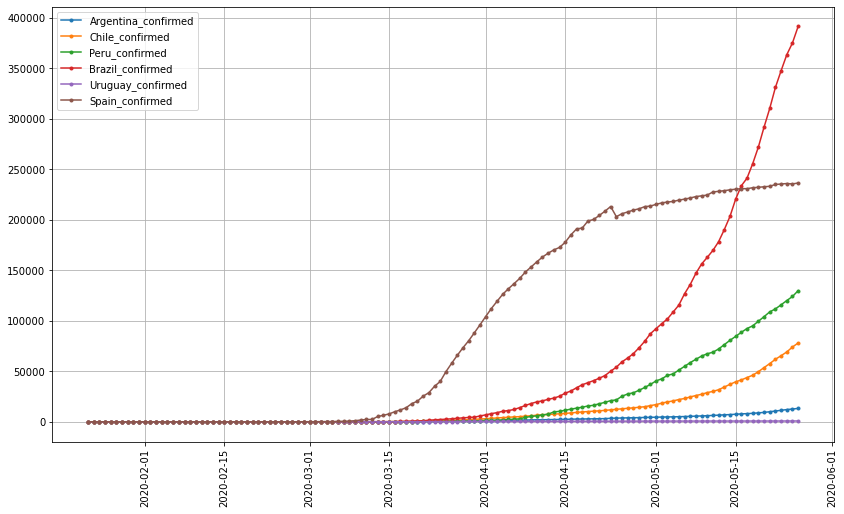

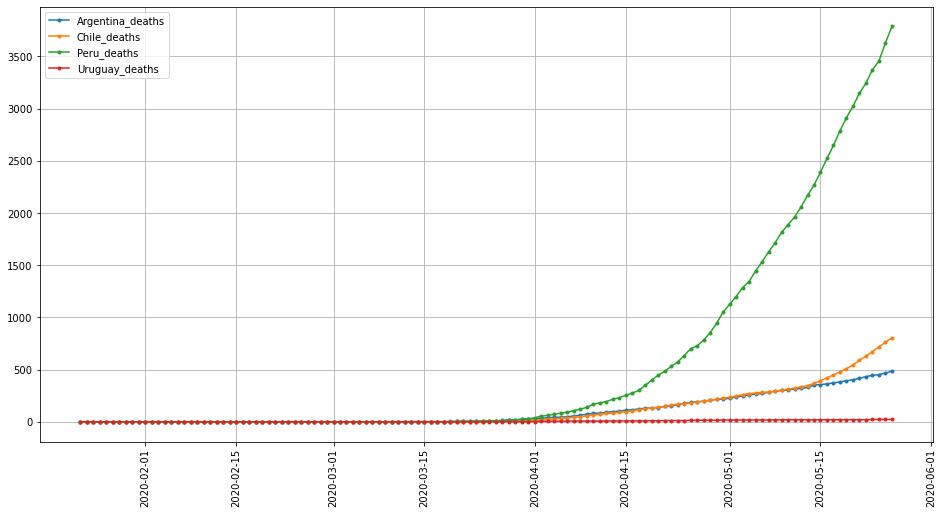

In [32]:
ax = None
import matplotlib.pyplot as plt

def plotregions(dataset, placelist, legend):
    for place in placelist:
        normalized_data = parse_by_region(dataset, place)
        npf1 = normalized_data

        x = []
        y = []
        for n,frame in enumerate(npf1):
            date = frame[n]['date']
            val = frame[n]['count']
            x.append(date)
            y.append(val)

        ax.plot(x,y,'o-', markersize=3, label=place+legend)

        
regions = ['Argentina','Chile', 'Peru', 'Brazil', 'Uruguay', 'Spain']

fig = plt.figure(figsize=(14,8))
ax= fig.subplots()

plotregions(df_confirmed, regions, '_confirmed')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

regions = ['Argentina','Chile', 'Peru', 'Uruguay']
fig = plt.figure(figsize=(16,8))
ax= fig.subplots()
plotregions(df_deaths, regions, '_deaths')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

## Converting Python's dict() to pandas.DataFrame()

In [9]:
regions = ['Argentina','Chile', 'Peru', 'Brazil', 'Uruguay', 'Spain', 'France', 'US', 'Germany', 'Sweden', 'Russia']

def by_place(ds, reg):
    locs = {}
    for place in reg:
        dates = []
        counts = []
        ndata = parse_by_region(ds, place)
        for n,frame in enumerate(ndata):
            date = frame[n]['date']
            val = frame[n]['count']
            dates.append(date)
            counts.append(val)

        _df2 = pd.DataFrame({'dates': dates, 'counts': counts}) 
        locs[place] = _df2
    return locs

confirmed = by_place(df_confirmed, regions)
deaths = by_place(df_deaths, regions)
recovered = by_place(df_recovered, regions)

print( deaths['Argentina'].describe() )
print( confirmed['Argentina'].describe() )

          counts
count 126.000000
mean  100.055556
std   140.942105
min     0.000000
25%     0.000000
50%     7.000000
75%   182.750000
max   484.000000
            counts
count   126.000000
mean   2242.396825
std    3212.399853
min       0.000000
25%       0.000000
50%     387.000000
75%    3736.750000
max   13228.000000


## Calculate some stats on the pandas (mu, variance, mean)

- Notice Mu, Sigma aren't properly collected
- Small variations from Numpy, Pandas and by-hand calculations
- Verify all the formulas again.

In [10]:

s = deaths['Argentina'] #numero de tests a saltear

_len = len(s)
cumsum = s.sum()  # sum function is wrong

#mu=12;sigma=0.25
mu = cumsum/s.size
#mean =  (s-mu)**2
#mean = np.mean(s, axis=1)
mean = s.mean()[0]
variance = np.var(s, ddof=1)
#variance = rr.var()[0]
#variance = (1/_len) * s.max()# Its wrong as its a cumulative sum
sigma = np.sqrt(variance)

print("mu = ", mu)
print("mean = ", mean)
print("variance = ", variance)
print("sigma = ", sigma)

print ("Mu - Mean < 0.01", abs(mu - np.mean(s)) < 0.01   )# must be true
print ("Sigma - Std < 0.01", abs(sigma - np.std(s, ddof=1)) < 0.01  ) # must be true

mu =  counts   50.027778
dtype: float64
mean =  100.05555555555556
variance =  counts   19864.676889
dtype: float64
sigma =  counts   140.942105
dtype: float64
Mu - Mean < 0.01 counts    False
dtype: bool
Sigma - Std < 0.01 counts    True
dtype: bool


### Patch some data

- Pandas need source datetime format reformatting
- Datetimes don't run fine for matplotlib. curious.

In [11]:
confirmed = by_place(df_confirmed, regions)
deaths = by_place(df_deaths, regions)
recovered = by_place(df_recovered, regions)

confirmed['Argentina'].iloc[1]

def fixdate(ds):
    ds['dates'] = pd.to_datetime(ds['dates'].astype(str), format='%Y-%m-%d')
    ds['dates'] = ds['dates'].dt.strftime('%d/%m/%Y')
    return ds
    
s = fixdate( deaths['Argentina'])
ss = fixdate( confirmed['Argentina'])

<Figure size 432x288 with 0 Axes>

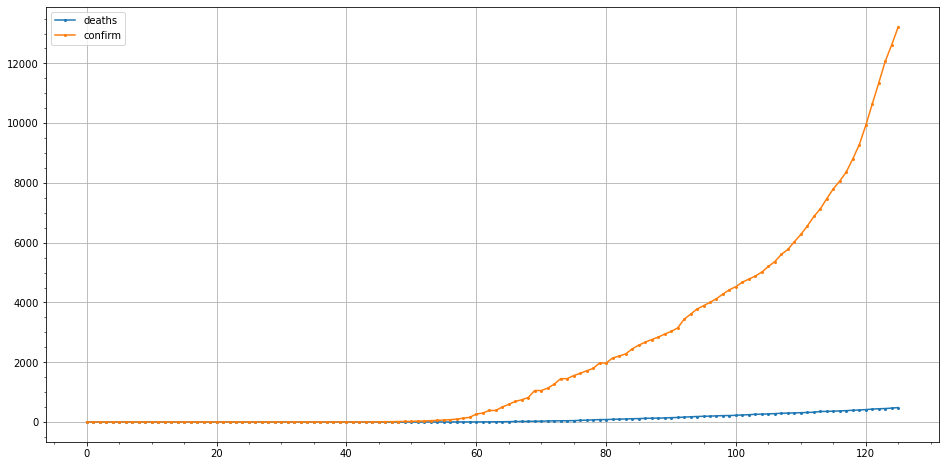

In [12]:
plt.tight_layout()
fig = plt.figure(figsize=(16,8))
ax = fig.subplots()

ax.plot(s.index,s.counts, 'o-', markersize=2,  label='deaths')
ax.plot(ss.index,ss.counts, 'o-', markersize=2, label='confirm')

plt.legend()
ax.set_axisbelow(True)
ax.minorticks_on()
plt.grid(True)
plt.show()

In [ ]:
### Some histogram from pandas data won't work at all 

- What a pandas.value means
- Datetimes are parsed as linear or something
- The deviation furmula isn't right.

TypeError: 'value' must be an instance of str or bytes, not a int

<Figure size 1080x432 with 0 Axes>

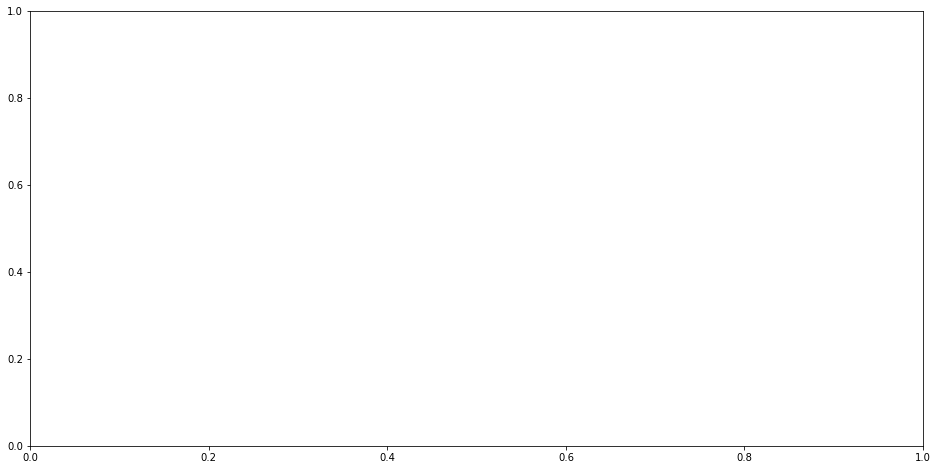

In [14]:
plt.rcParams["figure.figsize"]=15,6

plt.tight_layout()
fig = plt.figure(figsize=(16,8))
ax = fig.subplots()

count, bins, ignored = ax.hist(ss, bins= 90, density=True, stacked=True, cumulative=False, alpha=0.35, lw=0.8, edgecolor='black') # , color='green'

#print(count)
#print(ignored)

oneS = 1.2
onesigma = oneS/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

df3 = pd.DataFrame({'count': bins, 'Deviation': onesigma })
df3.plot(kind='scatter', x='count', y='Deviation', ax=ax, alpha=0.9, lw=0.8, color='indigo')

min_ylim, max_ylim = plt.ylim()
ax.axvline(mu, color='red', linestyle='dashed', linewidth=3)
plt.text(mu*1.02, max_ylim*1.02, '$\mu$: {:.2f}'.format(mu))

ax.axvline(mu+sigma*oneS, color='green', linestyle='dashed', linewidth=2)
plt.text(mu+sigma*1.02, max_ylim*1.02, '$\mu$ + $\sigma$: {:.2f}'.format(mu+sigma))

ax.set_axisbelow(True)
ax.minorticks_on()

ax.grid(which='major', linestyle='-', alpha=0.65, linewidth='0.5', color='navy')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show() ## This graph is wrong. it's just orientative for developing a cumsum() formula

In [ ]:
dist = {}
R = count
for i in range(len(R)-1):
    date = 
    value = np.float(R[i+1]-R[i] )
    dist['date'] = date
    dist['value'] = value

for i in range(len(dist)):
    if dist[i]>0.0001:
        print (i, dist[i])

KeyError: 'dates'

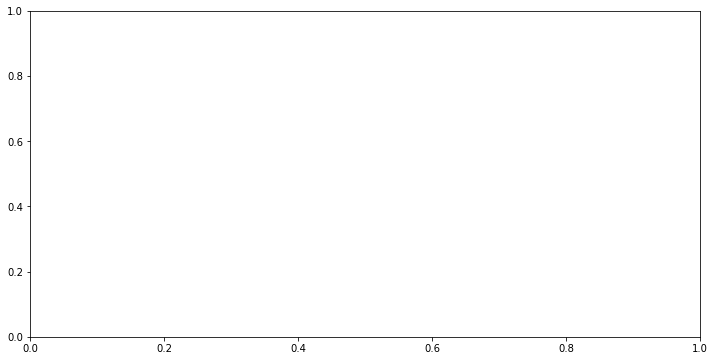

In [17]:
plt.rcParams["figure.figsize"]=12,6
fig, ax1 = plt.subplots()

df_confirmed.plot(kind='line', x='dates', y='counts', ax=ax1, alpha=0.9, lw=1.8, color='orange')

ax1.set_axisbelow(True)
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', alpha=0.65, linewidth='0.5', color='navy')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()  # Correct number of positives